# MNIST database

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

**The [MNIST database](http://yann.lecun.com/exdb/mnist/) is a large collection of handwritten digits that is commonly used as a benchmark dataset for image recognition tasks in machine learning. The MNIST digit dataset is a subset of this larger database and consists of 70,000 grayscale images of handwritten digits from zero to nine, each of which is 28 pixels wide and 28 pixels high.**

**This dataset is widely used as a benchmark dataset for training and evaluating machine learning models in image classification tasks, as it is relatively easy to work with and is large enough to provide a representative sample of the kinds of images that a model might encounter in the real world.** 

![MNIST sample images](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

**In this notebook, we will be implementing a `neural network`, from _scratch_, to tackle the multi-classification problem posed by the MINST digit dataset.**

**You can easily download the [mnist_train.csv](https://drive.google.com/uc?export=download&id=1OpgJOUnQEcTsLqH-t1t57INHtday4Ngm) and [mnist_test.csv](https://drive.google.com/uc?export=download&id=1T0jBQdD7Op7UXAhdlbOJHBSnWqHhRBLY) through these links.**

**`mnist_train` comes whit 60,000 samples and `mnist_test` with 10,000, both with features (784) and labels.**

**Below we loand and print a sample from this dataset. This is an 28x28 array that represents the gray pixel values of a "$5$".**


In [20]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/mnist_train.csv')
test = pd.read_csv('data/mnist_test.csv')

for i in train.drop('label', axis=1).iloc[0].values.reshape((28, 28)):
    for j in i:
        print(round(j, 2), end=" ")
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


**These big pixel numbers are not `neural-network` friendly. If we normalize these values (put all feature points in a range between 0 and 1), this can help improve the convergence rate of the training algorithm by ensuring that the input features have a similar scale and variance.**

**Normalization can also help improve the generalization performance of the model by reducing the sensitivity of the network to small changes in the input data.**

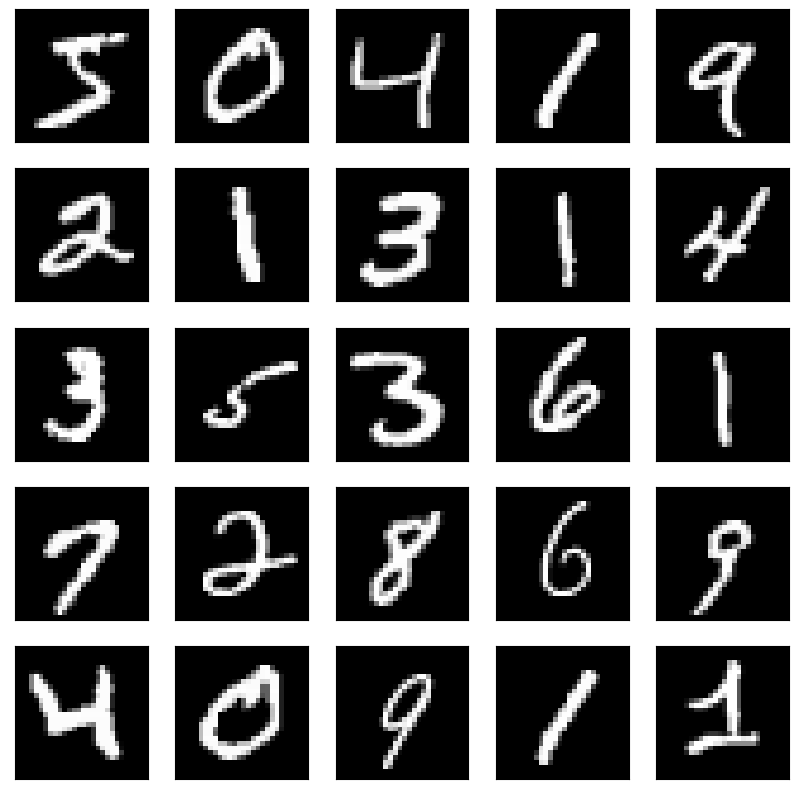

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x_train, y_train = np.array(
    train[train.columns.to_list()[1:]]).T, np.array(train['label'])

x_test, y_test = np.array(
    test[test.columns.to_list()[1:]]).T, np.array(test['label'])

x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(x_train[:, i, None].reshape(
        (28, 28)) * 255, interpolation='nearest')
    
plt.show()

**We will now implement a neural network, with one hidden layer, using only `Numpy`. Our input layer will have 784 units (784 pixels = 2D image 28x28).**

**Our hidden and output layers will have 10 units each. All initials will be randomly set between -0.5 and 0.5. In total we will have the following number of parameters ($\theta$):**

$$\theta = weigths ((10 \times 784) + (10 \times 10) = 7940) + biases (10 + 10 = 20) = 7960$$


In [24]:
def init_parameters():
    """
    Initialize the parameters of a two-layer neural network for image classification.
    
    Returns:
    - W1 (np.ndarray): weight matrix of shape (10, 784) for the first layer.
    - b1 (np.ndarray): bias vector of shape (10, 1) for the first layer.
    - W2 (np.ndarray): weight matrix of shape (10, 10) for the second layer.
    - b2 (np.ndarray): bias vector of shape (10, 1) for the second layer.
    
    The weight matrices are randomly initialized with values in the range [-0.5, 0.5], 
    and the bias vectors are initialized with values in the same range. These initial 
    values can be adjusted for different applications as needed.
    """
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

**As an activation function, we will use ReLU (Rectified Linear Unit). ReLU can be understood by this simple conditional statement:**

```python

if x > 0:
   x = x
else:
   x = 0

```


In [25]:
def ReLU(Z):
    """
    Applies the rectified linear unit (ReLU) activation function 
    element-wise to a given input.

    Args:
    - Z (np.ndarray): input array of any shape.

    Returns:
    - A (np.ndarray): output array of the same shape as Z, with ReLU applied element-wise.
    
    The ReLU function returns the element-wise maximum between 0 and the input array Z. 
    This has the effect of setting all negative values in Z to 0 and leaving all non-negative 
    values unchanged. The resulting array A has the same shape as Z.
    """
    return np.maximum(Z, 0)

**The softmax function is a commonly used activation function in machine learning for multi-class classification problems. It takes a vector of arbitrary real-valued scores and maps them to a probability distribution over the classes, ensuring that the probabilities sum up to 1.**

**We use the softmax function in machine learning to transform the raw output of a model into a probability distribution over classes, making it easier to interpret and compare the results.**

$$Pr(x_{0}) =  \frac{e^{x_{0}}}{e^{x_{0}} + e^{x_{1}} + e^{x_{2}} ... + e^{x_{n}}}$$


In [26]:
def softmax(Z):
    """
    Applies the softmax activation function element-wise to a given input.

    Args:
    - Z (np.ndarray): input array of shape (n,) or (m, n), where n is the number of classes.

    Returns:
    - A (np.ndarray): output array of the same shape as Z, with softmax applied element-wise.
    
    The softmax function applies the exponential function to each element of the input array Z, 
    and then normalizes the resulting array by dividing by the sum of the exponentials. This has 
    the effect of converting the input array into a probability distribution over the classes, 
    with each element representing the probability of the corresponding class. The resulting 
    array A has the same shape as Z.
    """
    softmax = np.exp(Z) / sum(np.exp(Z))
    return softmax

**This network has 3 layers: input ($a_{0}$), hidden ($a_{1}$), and output ($a_{2}$):**

- **$w_{1}$ is the parameters between $a_{0}$ and $a_{1}$.**
- **$b_{1}$ is the bias of $w_{1}$.**
- **$w_{2}$ is the parameters between $a_{1}$ and $a_{2}$.**
- **$b_{2}$ is the bias of $w_{2}$ (parameters are associated with connections, bias to nodes).**
- **$z_{1}$ is the scalar product of the input signal $a_{0}$ (784 = 28x28) with $w_{1} + b_{1}$:**

$$w_{1} \cdot x_{1} + w_{2} \cdot x_{2} ... w_{784} \cdot x_{784} + b_{1}$$

- **the final output of $a_{1}$ is $ReLU(z_{1})$.**
- **$z_{2}$ = the scalar product of $ReLU(z_{1})$ with $w_{2}$ + $b_{2}$.**
- **the final output of $a_{2}$ is $softmax(z_{2})$.**

**This is the forward pass of our network.**


In [28]:
def forward_propagation(W1, b1, W2, b2, X):
    """
    Implements forward propagation for a two-layer neural network.

    Args:
    - W1 (np.ndarray): weight matrix of shape 
        (hidden_units, input_units) for the first layer.
    - b1 (np.ndarray): bias vector of shape 
        (hidden_units, 1) for the first layer.
    - W2 (np.ndarray): weight matrix of shape 
        (output_units, hidden_units) for the second layer.
    - b2 (np.ndarray): bias vector of shape 
        (output_units, 1) for the second layer.
    - X (np.ndarray): input array of shape 
        (input_units, m), where m is the number of examples.

    Returns:
    - Z1 (np.ndarray): linear transformation of input array 
        by the first weight matrix plus the first bias vector, 
        of shape (hidden_units, m).
    - A1 (np.ndarray): activation of the first layer obtained 
        by applying ReLU element-wise to Z1, of shape 
        (hidden_units, m).
    - Z2 (np.ndarray): linear transformation of the first layer 
        activation by the second weight matrix plus the second 
        bias vector, of shape (output_units, m).
    - A2 (np.ndarray): output of the neural network obtained by 
        applying softmax element-wise to Z2, of shape 
        (output_units, m).
    """

    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


**Given this output, we will compare it with the ground truth. labels will be `one_hot_encoded` in this implementation. One hot encoding means transforming categorical labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] into sparse binary vectors:**

```python

- '0' = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- '1' = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- '2' = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
.
.
.
- '9' = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [27]:
def one_hot_encoding(Y):
    """
    Performs one-hot encoding on an array of labels.

    Args:
    - Y (np.ndarray): input array of shape (m,) 
        containing integer labels.

    Returns:
    - one_hot_Y (np.ndarray): output array of shape (n, m) 
        containing one-hot encodings of the input labels, 
        where n is the number of unique labels in Y.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

**For the backward pass, we will need to "undo" the ReLU, and for this, we need the derivative (_slope of the line tangent to the function at any point in the function_) of the ReLU function, which (luckily) is extremely simple:**

```python

if x > 0:
   x = 1
else:
   x = 0

```


In [29]:
def ReLU_derivative(Z):
    """
    Computes the derivative of the Rectified 
    Linear Unit (ReLU) activation function.

    Args:
    - Z (np.ndarray): input array of shape (n, m), where n 
        is the number of neurons and m is the number of examples.

    Returns:
    - dA (np.ndarray): output array of shape (n, m) 
        containing the derivatives of the ReLU activation function 
        at the input Z.

    The derivative of the ReLU function is defined as follows:

        - if Z > 0, dA/dZ = 1
        - if Z <= 0, dA/dZ = 0
    """
    return Z > 0

**With all these pices, we can build our backward propagation:**

- **$dz_{2}$ = (what was predicted, $a_{2}$) $-$ (the correct category).**
- **$dw_{2}$ = $\frac{1}{60000} \times (dz_{2} \cdot a_{1})$.**
- **$db_{2}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{2}$.**
- **$dz_{1}$ = $w_{2} \cdot dz_{2} \times dReLU(z_{1})$.**
- **$dw_{1}$ = $\frac{1}{60000} \times (dz_{1} \cdot x)$.**
- **$db_{1}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{1}$.**


In [36]:
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Computes the gradients of the weights and biases of a 
    two-layer neural network using backpropagation.

    Args:
        - Z1 (np.ndarray): input array of shape (n1, m).
        - A1 (np.ndarray): output array of shape (n1, m).
        - Z2 (np.ndarray): input array of shape (n2, m).
        - A2 (np.ndarray): output array of shape (n2, m).
        - W1 (np.ndarray): weight matrix of shape (n1, input_dim).
        - W2 (np.ndarray): weight matrix of shape (n2, n1).
        - X (np.ndarray): input array of shape (input_dim, m).
        - Y (np.ndarray): target array of shape (m,) 
            containing the true labels of the examples.

    Returns:
        - dW1 (np.ndarray): gradient of the weight matrix W1 with respect to the loss function.
        - db1 (np.ndarray): gradient of the bias vector b1 with respect to the loss function.
        - dW2 (np.ndarray): gradient of the weight matrix W2 with respect to the loss function.
        - db2 (np.ndarray): gradient of the bias vector b2 with respect to the loss function.
    """
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / x_train.shape[1] * dZ2.dot(A1.T)
    db2 = 1 / x_train.shape[1] * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / x_train.shape[1] * dZ1.dot(X.T)
    db1 = 1 / x_train.shape[1] * np.sum(dZ1)
    return dW1, db1, dW2, db2


**After the backward pass, we need to update our parameters. And we do this update in relation to a learning rate, which is the optimizer's step size ("_how much we will change the current parameter per update_").**

- **$w_{new\;1} = w_{old\;1} - (\alpha \times dw_{1})$.**
- **$b_{new\;1} = b_{old\;1} - (\alpha \times db_{1})$.**
- **$w_{new\;2} = w_{old\;2} - (\alpha \times dw_{2})$.**
- **$b_{new\;2} = b_{old\;2} - (\alpha \times db_{2})$.**



In [32]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Update the weights and biases of the neural network based on 
    the calculated gradients and learning rate.

    Parameters:
        W1 (numpy array): weights of the first layer (10 x 784).
        b1 (numpy array): biases of the first layer (10 x 1).
        W2 (numpy array): weights of the second layer (10 x 10).
        b2 (numpy array): biases of the second layer (10 x 1).
        dW1 (numpy array): gradients of the weights of the first layer (10 x 784).
        db1 (numpy array): gradients of the biases of the first layer (10 x 1).
        dW2 (numpy array): gradients of the weights of the second layer (10 x 10).
        db2 (numpy array): gradients of the biases of the second layer (10 x 1).
        alpha (float): learning rate for updating the parameters.

    Returns:
        W1 (numpy array): updated weights of the first layer (10 x 784).
        b1 (numpy array): updated biases of the first layer (10 x 1).
        W2 (numpy array): updated weights of the second layer (10 x 10).
        b2 (numpy array): updated biases of the second layer (10 x 1).
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


**Let us now create functions to give us predictions and an accuracy score.**


In [38]:
def get_predictions(A2):
    """
    Get the predicted class for each input in the batch, 
    based on the output probabilities of the last layer.

    Parameters:
        - A2 (numpy array): output probabilities of the last 
        layer (10 x number of examples).

    Returns:
        - predictions (numpy array): predicted class for 
        each input in the batch (1 x number of examples).
    """
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

**Tying all together, we have a training function via `gradient descent`!**


In [39]:
W1_history = []
b1_history = []
W2_history = []
b2_history = []

def gradient_descent(X, Y, alpha, iterations):

    """
    Train a neural network using gradient descent 
    and return the learned parameters.

    Parameters:
        - X (numpy array): input data matrix of shape 
        (number of features x number of examples).
        - Y (numpy array): true labels matrix of shape (1 x number of examples).
        - alpha (float): learning rate.
        - iterations (int): number of iterations of gradient descent to run.

    Returns:
        - W1 (numpy array): learned weight matrix of the first layer.
        - b1 (numpy array): learned bias matrix of the first layer.
        - W2 (numpy array): learned weight matrix of the second layer.
        - b2 (numpy array): learned bias matrix of the second layer.
    """

    W1, b1, W2, b2 = init_parameters()

    for i in range(iterations):

        W1_history.append(W1)
        b1_history.append(b1)
        W2_history.append(W2)
        b2_history.append(b2)

        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)

        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)

        W1, b1, W2, b2 = update_parameters(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 100 == 0 or i == 0:

            print('Epoch: ', i)

            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)

            print(f'Accuracy: {round(acc * 100, 2)}%\n')

    return W1, b1, W2, b2


**Now, we will train our network with a `learning_rate` of 0.10, for 500 epochs.**

In [40]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Epoch:  0
Accuracy: 10.41%

Epoch:  100
Accuracy: 62.64%

Epoch:  200
Accuracy: 75.08%

Epoch:  300
Accuracy: 79.95%

Epoch:  400
Accuracy: 82.47%



**It would be difficult to plot how each parameter changed over time, but we could show how the distribution changed from a random uniform distribution $[-0.5, 0.5]$ to a "_multimodal distribution_".**

**This phenomenon can have many causes.**

**Trained neural networks, for example, can have multimodal weight distributions due to the existence of different local minima in the loss function that the optimization algorithm has converged to during training.**

**Furthermore, our distribution contains some outliers (a small number of weights with high/low values). This is to be expected. Weights in a neural network are feature detectors, so a specific pattern is linked to specific weights by a strong value, but the rest should not cause any activations in the neurons in the next layer.**

In [64]:
import plotly.express as px

fig = px.histogram(x=np.append(W1_history[0].flatten(), W2_history[0].flatten()))

fig.update_layout(template='plotly_dark', 
                  title='Distribution of weights in the input layer (Epoch 1)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()

fig = px.histogram(x=np.append(W1_history[-1].flatten(), W2_history[-1].flatten()))

fig.update_layout(template='plotly_dark', 
                  title='Distribution of weights in the input layer (Epoch 500)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()


**Let us now use our `test_set` to make some predictions with unseen data.**


Predicted Label:  [7]
True Label:  7


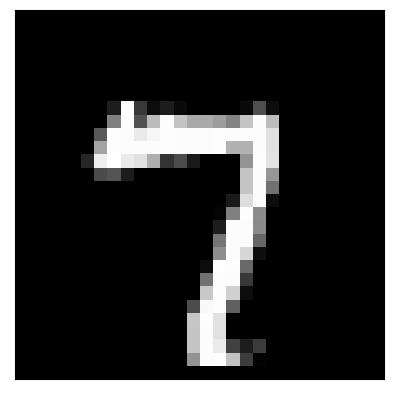

Predicted Label:  [7]
True Label:  2


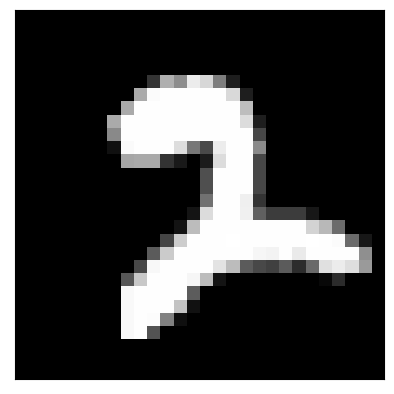

Predicted Label:  [6]
True Label:  6


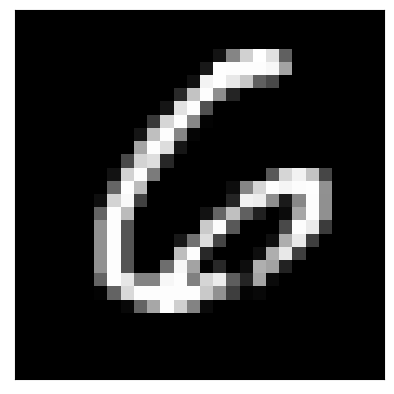

Predicted Label:  [2]
True Label:  2


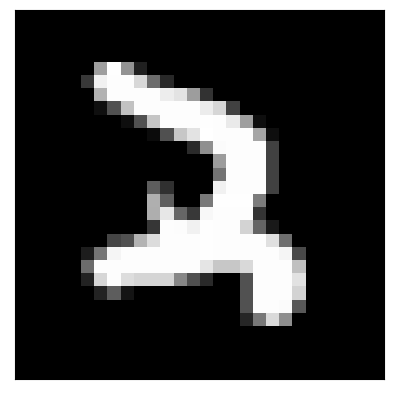

Predicted Label:  [6]
True Label:  6


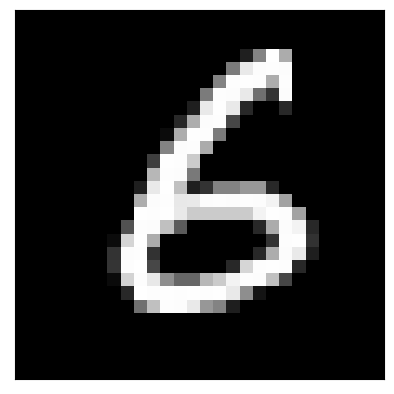

Accuracy in test: 85.49 %


In [65]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print('Predicted Label: ', prediction)
    print('True Label: ', label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


for i in range(5):
    test_prediction(np.random.randint(0, 9999), W1, b1, W2, b2)

predictions = make_predictions(x_test, W1, b1, W2, b2)
print(
    f'Accuracy in test: {round(get_accuracy(predictions, y_test) * 100, 2)} %')


**Congratulations, you have just implemented a neural network using only linear algebra!** 🙃

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
